In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [7]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [8]:
df=pd.get_dummies(data,drop_first=True)
# df.drop(columns='Sex_female',inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalar=StandardScaler()
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [11]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [12]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.645850
75%,3.000000,38.000000,1.000000,1.000000,33.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [14]:
columns=["Pclass","Age","SibSp","Parch","Fare"]
X_Norm=X
X_Norm[columns]=scalar.fit_transform(X[columns])

In [15]:
X_Norm.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
X_Norm

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,True,False,True
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,False,False,False
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,False,False,True
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,False,False,True
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,True,False,True
...,...,...,...,...,...,...,...,...
885,0.908600,0.646142,-0.552714,5.350885,-0.102875,False,True,False
886,-0.287191,-0.182430,-0.552714,-0.506787,-0.407687,True,False,True
887,-1.482983,-0.734812,-0.552714,-0.506787,-0.086335,False,False,True
889,-1.482983,-0.251478,-0.552714,-0.506787,-0.086335,True,False,False


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=100)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error,confusion_matrix
import seaborn as sns
mean_squared_error(y_pred=y_pred,y_true=y_test)

0.1527777777777778

In [26]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
720,-0.287191,-1.632431,-0.552714,0.664747,-0.029626,False,False,True
879,-1.482983,1.819952,-0.552714,0.664747,0.918520,False,False,False
360,0.908600,0.715189,0.522511,4.179350,-0.126032,True,False,True
192,0.908600,-0.734812,0.522511,-0.506787,-0.504959,False,False,True
770,0.908600,-0.389573,-0.552714,-0.506787,-0.473848,True,False,True
...,...,...,...,...,...,...,...,...
167,0.908600,1.060427,0.522511,4.179350,-0.126032,False,False,True
663,0.908600,0.438999,-0.552714,-0.506787,-0.511734,True,False,True
622,0.908600,-0.665764,0.522511,0.664747,-0.355861,True,False,False
449,-1.482983,1.543761,-0.552714,-0.506787,-0.076884,True,False,True


In [23]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1], dtype=int64)

<Axes: >

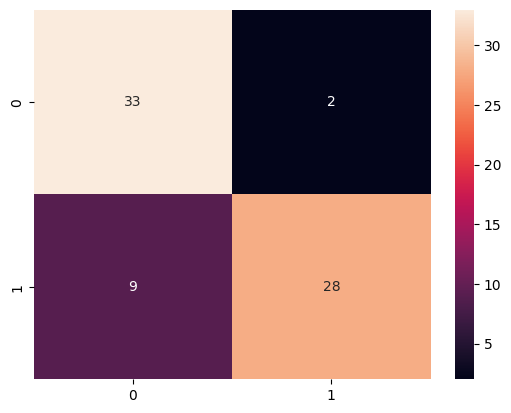

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [25]:
import pickle
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)